## Decision Trees

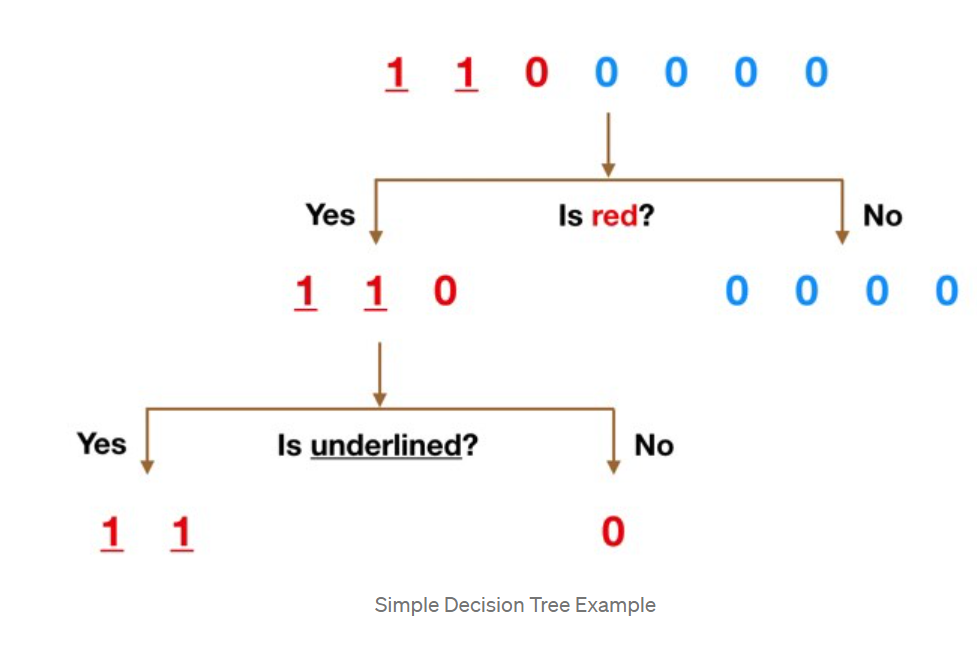

Imagine the dataset has 7 instances, with 2 1s and five 0s. we want to separate the class using the features of this data. Features are color red and whether the observation is underlined or not.



In real life our data will not be as clean but the logic that a decision tree employs remains the same. At each node , it will ask : What feature will allow me to split the observations at hand in a way that the resulting groups are as different from each other as possible (and the members of each resulting subgroup are as similar to each other as possible)? This is often termed as 'Purity'.

## How do we measure purity?
1) Gini Index : $\sum_{k} {\hat{p_k}} (1 - {\hat{p_k}} )$

2) Entropy :  -$\sum_{k} {\hat{p_k}} \log{\hat{p_k}} $

## Ensemble Methods

Are methods in ML paradigm where multiple models are trained to solve the same problem and often combined to get better results.

In ensemble learning, we call the base models(weak learners) that can be used as building blocks for designing more complex models by combining several of them.

Most of the time, these basic models perform not so well by themselves either because they have a high bias (low degree of freedom models, for example) or because they have too much variance to be robust (high degree of freedom models, for example). Then, the idea of ensemble methods is to try reducing bias and/or variance of such weak learners by combining several of them together in order to create a strong learner (or ensemble model) that achieves better performances.

Next task is to combine weak learners.

## How to combine weak learners

There are three major algorithms that aims at combining weak learners:

1) Bagging

2) Boosting

3) Stacking

## Bagging / Bootstrap Aggregating

What is Bootstrapping?:
Is randomly picking samples from a pool of data with replacement.

Why do we bootstrap?:
For some good statistical properties. such as they an be considered as representative abd independent samples of the true data distribution. (i.i.d)

What is bagging?: we want to fit several independent models and “average” their predictions in order to obtain a model with a lower variance.

First, we create multiple bootstrap samples so that each new bootstrap sample will act as another (almost) independent dataset drawn from true distribution. Then, we can fit a weak learner for each of these samples and finally aggregate them such that we kind of “average” their outputs and, so, obtain an ensemble model with less variance that its components.

Averaging can be done by taking Majority voting for classification problems and taking a mean for regression problems.

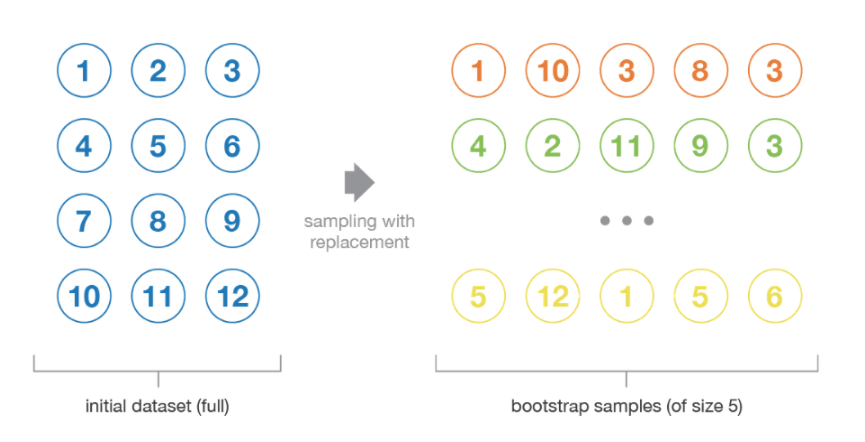

In [1]:
### Bagging Classifier code 
from sklearn import datasets
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
### Loading Data
iris = datasets.load_iris()

In [3]:
## Extracting Data
X = iris.data
y = iris.target

In [4]:
## Splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [5]:
## Creating a baggingclassifier
clf = BaggingClassifier(n_estimators=10, random_state=0).fit(x_train, y_train)

In [6]:
## Prediciting using the trained model
y_pred=clf.predict(x_test)

In [7]:
## Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

In [8]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9736842105263158


## Random Forest

When we use Decision Trees as the base models for ensemble learning, then strong learners which are composed of multiple trees can be called 'forests'.

Trees that compose a forest can be chosen to be either shallow or deep. Shallow trees have less variance but higher bias and are better choice for sequential methods.

Deep Trees have low bias but high variance. hence are relevant choices for bagging method that is mainly focused at reducing variance.

Random Forest is an extension over bagging. The random forest approach is a bagging method where deep trees, fitted on bootstrap samples, are combined to produce an output with lower variance. However, random forests also use another trick to make the multiple fitted trees a bit less correlated with each others: when growing each tree, instead of only sampling over the observations in the dataset to generate a bootstrap sample, we also sample over features and keep only a random subset of them to build the tree.

In [ ]:
## Random Forest 
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf1 = RandomForestClassifier(n_estimators = 200, max_depth= None, bootstrap = True, random_state=0).fit(x_train, y_train)

In [ ]:
y_pred_RF = clf1.predict(x_test)

In [ ]:
## Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_RF)
cnf_matrix

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_RF))

Accuracy: 0.9736842105263158


## Boosting

Unlike Bagging, Boosting is a sequential method. In boosting the different combined weak models are no longer fitted independently from each others. The idea is to fit models iteratively. “Boosting” produces an ensemble model that is in general less biased than the weak learners that compose it.

Each model in the sequence is fitted giving more importance to observations in the dataset that were badly handled by the previous models in the sequence. Intuitively, each new model focus its efforts on the most difficult observations to fit up to now, so that we obtain, at the end of the process, a strong learner with lower bias.

Being mainly focused at reducing bias, the base models that are often considered for boosting are models with low variance but high bias. For example, if we want to use trees as our base models, we will choose most of the time shallow decision trees with only a few depths.

Another important reason that motivates the use of low variance but high bias models as weak learners for boosting is that these models are in general less computationally expensive to fit (few degrees of freedom when parametrised). Indeed, as computations to fit the different models can’t be done in parallel (unlike bagging), it could become too expensive to fit sequentially several complex models.

## How to aggregate and fit sequential models?

1) Once the weak learners are identified, how will they be sequentially fitted (what information from previous models do we take into account when fitting current model?)

2) how they will be aggregated (how do we aggregate the current model to the previous ones?)

## Two different algorithms for boosting based on how they create and aggregate the weak learners during the Sequential procees:

1) Adaptive Boosting (adaboost)

2) Gradient Boosting

## Adaptive Boosting and Gradient Boosting

In boosting we try to define our ensemble model as a weighted sum of L weak learners:

$S_l = \sum_L c_l * w_l(.)$,       where $c_l$'s are the co-efficients and $w_l$'s are the weak learners.

Finding the best ensemble model with this form is a difficult optimisation problem. Then, instead of trying to solve it in one single shot (finding all the coefficients and weak learners that give the best overall additive model), we make use of an iterative optimisation process that is much more tractable.


##Comparison
1) Adaboost minimizes the exponential loss while anmy differentiable loss function can be used in gradient boosting. Gradient boosting is more flexible than ada boost.

2) Main difference: How shortcomings of existing weak learners are computed.
In Adaboost the weakness is identified by high weight data points.
In gradient boosting the same is identified by the gradient information.

In [ ]:
## Adaboost Code
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
clf2 = AdaBoostClassifier(n_estimators=100, random_state=0)

In [ ]:
clf2.fit(x_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [ ]:
y_pred_ADA = clf2.predict(x_test)

In [ ]:
## Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_ADA)
cnf_matrix

array([[13,  0,  0],
       [ 0, 16,  0],
       [ 0,  4,  5]])

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_ADA))

Accuracy: 0.8947368421052632


In [ ]:
## Gradient Boost
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
clf3 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(x_train, y_train)

In [ ]:
y_pred_Grad = clf3.predict(x_test)

In [ ]:
## Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_Grad)
cnf_matrix

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_Grad))

Accuracy: 0.9736842105263158
